# Overview

The goal of this project is to train a machine learning classification algorithm to recognize and correctly classify handwritten digits. The basic outline will be as follows:
<ol>
<li>Import the data</li>
<li>Figure out a way to convert the image data into vectors</li>
<li>Split the converted data into a training set, a CV set, and a test set.</li>
<li>Train the algorithm on the test set.</li>
<li>Check the accuracy on the CV set.</li>
<li>Test the algorithm on the test set.</li>
</ol>

# 1. Importing the Data

As it is supplied, the data is actually already in vector format. I've saved it as a file called ``train.csv``. Each image is 28 x 28 pixels, which equals 784 pixels total. As a result, the feature vector for each sample should have 784 elements. The pixel value ranges from 0 (light) to 255 (dark). The first column in the ``train.csv`` file is the label for that image, so we'll have to save that in the ``y`` vector.

In [1]:
# set up the libraries for loading and visualizing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data.loc[0:5000]

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = data['label'] # create label vector

In [6]:
X = data.drop('label',axis=1) # create X vector of samples

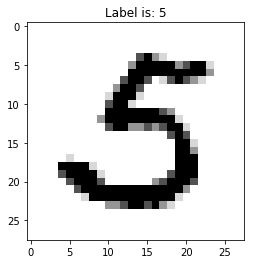

In [7]:
# Convert an array into an image
i = 557;
# isolate the data of interest
test_img = X.loc[i]

# convert into a matrix
vec = np.asarray(test_img).reshape((28,28))

# convert to image
plt.imshow(vec,interpolation='nearest',cmap="Greys")

# Add label to the title of the pic
plt.title("Label is: %d" % y.loc[i])

# 3. Split the Data into Training, CV, and Test Sets

I am going to use sklearn to train a logistic regression classifier. I can also use sklearn to split the ``train.csv`` data into training, cross validation (CV), and test sets. 

In [8]:
# import libraries
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [10]:
X_train.shape # size of the training set

(3350, 784)

In [11]:
X_test.shape # size of the test set

(1651, 784)

# 4. Train the Algorithm on the Training Set

I'm going to use a logistic regression classifier to classify this data.

In [20]:
# import logistic regression model
from sklearn import linear_model
logreg = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs');

# train the logistic regression classifier
logreg.fit(X_train,y_train);

# find predictions using this classifier
y_pred = logreg.predict(X_test)


In [21]:
# find the score of the classifier

# import library
from sklearn.metrics import accuracy_score

# find the score
pred_score = accuracy_score(y_test,y_pred)

In [22]:
pred_score

0.87583282858873412

## Take a look at where the mismatches occur

We can use a dataframe to look at which numbers seem to trip up the classifier. Knowing this might help us make better decisions about tuning the training algorithm.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9dbd80860>]], dtype=object)

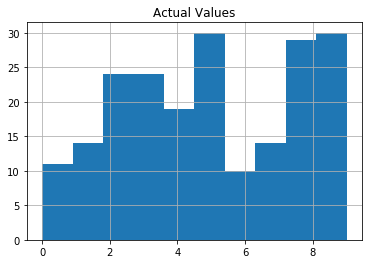

In [23]:
mismatch = pd.DataFrame({"Predictions":y_pred,"Actual Values":y_test,"Matches?":(y_pred == y_test)})
mismatch[mismatch["Matches?"] == False].hist(column="Actual Values")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9dbdf4898>]], dtype=object)

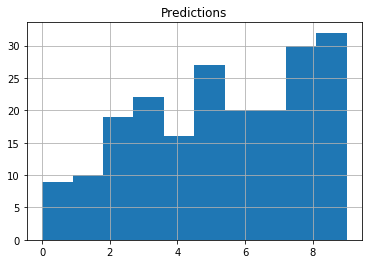

In [24]:
mismatch[mismatch["Matches?"] == False].hist(column="Predictions")

## change C (inverse regularization parameter)

Decreasing the value of the inverse regularization parameter, C, means we increase regularization strength. $$ C= \frac{1}{\lambda} $$ Increasing regularization strength means we increase the penalty for incorrect predictions.

In [28]:
logreg_2 = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',C=100);

# train the logistic regression classifier
logreg_2.fit(X_train,y_train);

# find predictions using this classifier
y_pred_2 = logreg_2.predict(X_test)

# get score of model accuracy
pred_score_2 = accuracy_score(y_test,y_pred_2)

# show score
pred_score_2

0.87159297395517865

In [29]:
pred_score

0.87583282858873412

# Try SVM

In [30]:
from sklearn.svm import SVC
svm_1 = SVC(kernel='linear',C=1.0, random_state=0)
svm_1.fit(X_train,y_train)
y_pred_3 = svm_1.predict(X_test);
pred_score_3 = accuracy_score(y_test,y_pred_3)
pred_score_3

0.91096305269533617

Using a basic SVM improved the accuracy of the model to ~91%. We can change some of the parameters of the SVM model to optimize it and hopefully increase the accuracy of the trained algorithm. Here are some of the parameters that we can change:
* ``kernel``: default is ``rbf``
* ``gamma``: kernel coefficient, a smaller ``gamma`` results in a "softer" deicsion boundary (less prone to overfitting)
* ``C``: this is the penalty parameter for the error term

## Change kernel type

### RBF: 

In [34]:
svm_2 = SVC(kernel='rbf',C=1.0, random_state=0)
svm_2.fit(X_train,y_train)
y_pred_4 = svm_2.predict(X_test);
pred_score_4 = accuracy_score(y_test,y_pred_4)
pred_score_4

0.099333737129012722

This one performed terribly.

### poly

In [37]:
svm_3 = SVC(kernel='poly',C=1.0, random_state=0)
svm_3.fit(X_train,y_train)
y_pred_5 = svm_3.predict(X_test);
pred_score_5 = accuracy_score(y_test,y_pred_5)
pred_score_5

0.93397940642035127

This one performed well, even better than using a ``linear`` kernel.

In [36]:
pred_score_3 # linear kernel score

0.91096305269533617

### sigmoid

In [40]:
svm_4 = SVC(kernel='sigmoid',C=1.0, random_state=0)
svm_4.fit(X_train,y_train)
y_pred_6 = svm_4.predict(X_test);
pred_score_6 = accuracy_score(y_test,y_pred_6)
pred_score_6

0.099333737129012722

Sigmoid also performed very poorly. Maybe it's just not the right kernel for this type of dataset.

## Adjusting gamma

In [46]:
# gamma = 10;
svm_5 = SVC(kernel='poly',C=1.0, random_state=0,gamma=100.0)
svm_5.fit(X_train,y_train)
y_pred_7 = svm_5.predict(X_test);
pred_score_7 = accuracy_score(y_test,y_pred_7)
pred_score_7

0.93397940642035127

I tried ``gamma`` = 1.0,10.0,and 100.0 and got the same accuracy score for all 3 values..

## Adjusting C

In [47]:
svm_6 = SVC(kernel='poly',C=10.0, random_state=0,gamma=1.0)
svm_6.fit(X_train,y_train)
y_pred_8 = svm_6.predict(X_test);
pred_score_8 = accuracy_score(y_test,y_pred_8)
pred_score_8

0.93397940642035127

Sort of weird, I'm getting the same accuracy score again even when I change ``C``.

# Now try using the whole set

So far, I was working with a subset of the full dataset because it was faster for my computer to compute. Now that I've (sort of) narrowed it down to ``svm_6``,I'll try training and testing on the full dataset with this model.

In [48]:
data = pd.read_csv('train.csv')
X = data.drop('label',axis=1) # create X vector of samples
y = data['label'] # create label vector
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

svm_6.fit(X_train,y_train)
y_pred_9 = svm_6.predict(X_test)
pred_score_9 = accuracy_score(y_test,y_pred_9)
pred_score_9

0.97337662337662334

Cool!! Adding more samples definitely increased my accuracy score! The algorithm was able to converge also, which it had issues with using the logistic regression model.